# Mushroom foraging with Hypertools

### This dataset contains descriptive features of various mushroom species, as well as labels indicating whether tor not they are poisonous. It was downloaded from https://www.kaggle.com/uciml/mushroom-classification

### Import the libraries we need

In [1]:
import pandas as pd
import hypertools as hyp
%matplotlib inline

### Read in the data with pandas

In [2]:
data = pd.read_csv('data/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### pop off column indicating poisonous/non-poisonous

In [3]:
class_labels = data.pop('class')

### Now let's plot the high-dimensional data in a low dimensional space by converting it to a numpy array and passing it to hyperplot.

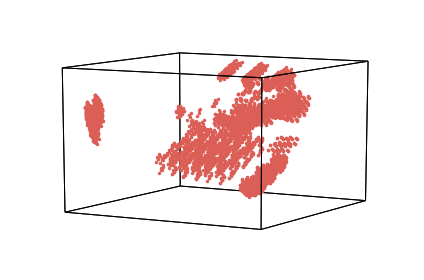

In [4]:
geo = hyp.plot(data, '.') # if the number of features is greater than 3, the default is to plot in 3d

### From the plots above, it's clear that there are multiple clusters in this data. In addition to descriptive features, this dataset also contains whether or not the mushroom is poisonous.  Do these clusters have bearing on whether or not the mushroom is poisonous?  Let's try to understand this by coloring the points based on whether the mushroom is poisonous:

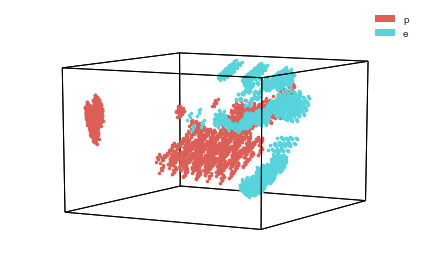

In [5]:
geo = hyp.plot(data, '.', group=class_labels, legend=list(set(class_labels)))

###  From the plot above it is clear that the clustering of the mushrooms carries information about whether or not they are poisonous (red refers to non-poisonous and blue is poisonous). It also looks like there are a number of distinct clusters that are poisonous/non-poisonous.

### Let's use the 'cluster' feature of hypertools to discover these clusters using a k-means fitting procedure:

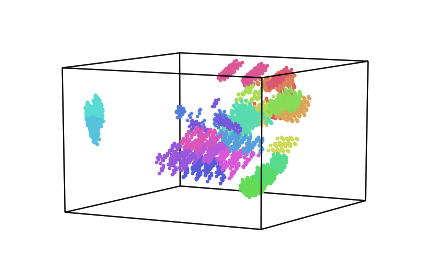

In [6]:
geo = hyp.plot(data, '.', n_clusters=23)

# you can also recover the cluster labels using the cluster tool
cluster_labels = hyp.cluster(data, n_clusters=23) 

# hyp.plot(data, 'o', point_colors=cluster_labels, ndims=2)

### Sidenote: we can change the color palette using the palette argument.  Hypertools supports matplotlib and seaborn color palettes.

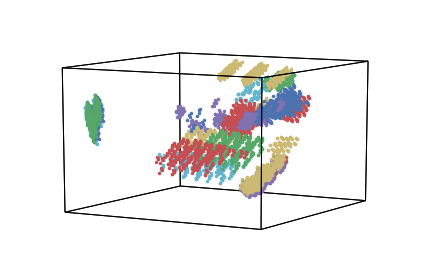

In [7]:
geo = hyp.plot(data, '.', group=cluster_labels, palette="deep")

### Hypertools uses PCA to reduce the dimensionality by default, but there are other ways to do dimensionality reduction.  Let's try reducing with various techniques, but keeping the cluster labels the same.

## ICA

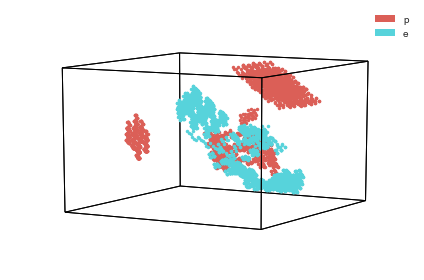

In [15]:
geo_ica = hyp.plot(data, '.', group=class_labels, legend=list(set(class_labels)), reduce='FastICA',  ndims=3)

## t-SNE

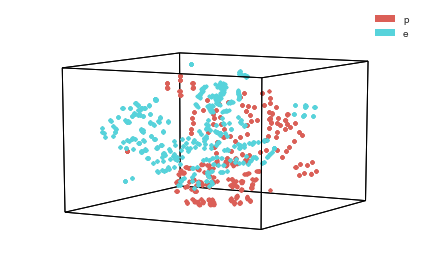

In [16]:
geo_tsne = hyp.plot(data, '.', group=class_labels, legend=list(set(class_labels)), reduce='TSNE', ndims=3)

### Now THAT is some interesting structure...Let's compare all three plots to one another to contrast their effects to see what 

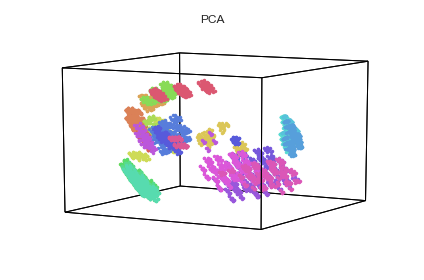

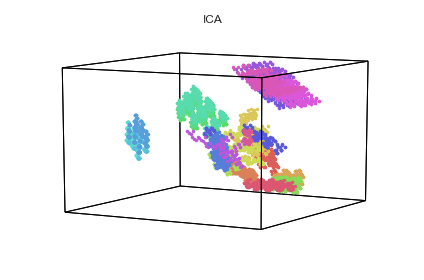

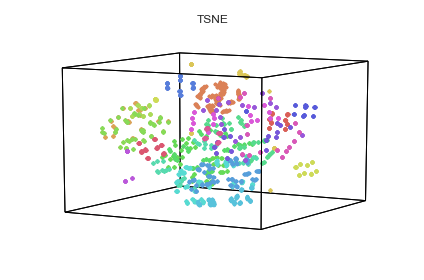

In [19]:
geo = hyp.plot(data, '.', group=cluster_labels, reduce='PCA', title='PCA')
geo_ica.plot(group=cluster_labels, legend=None, title='ICA')
geo_tsne.plot(group=cluster_labels, legend=None, title='TSNE')

### PCA projection with different k values

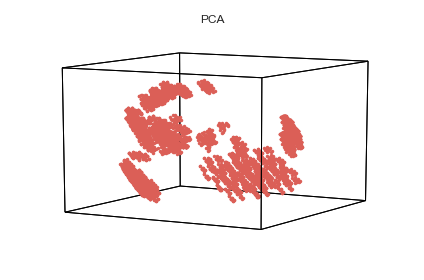

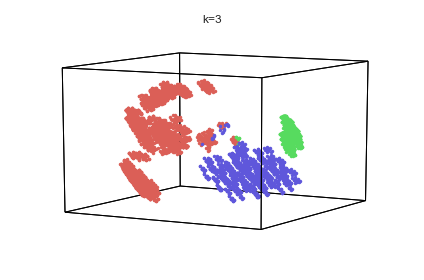

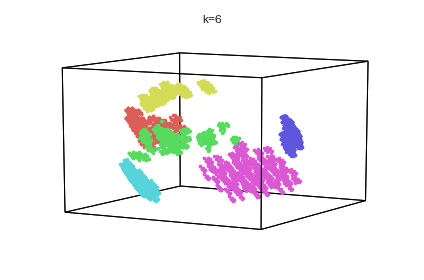

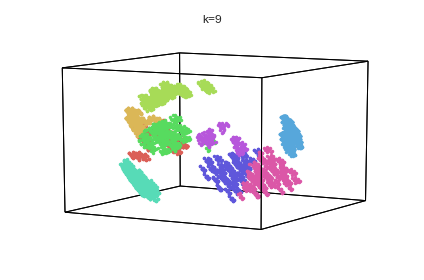

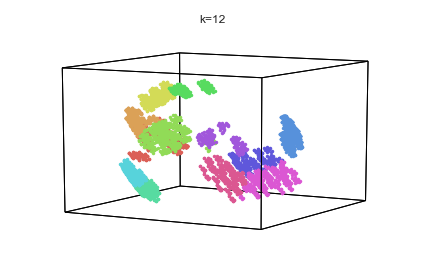

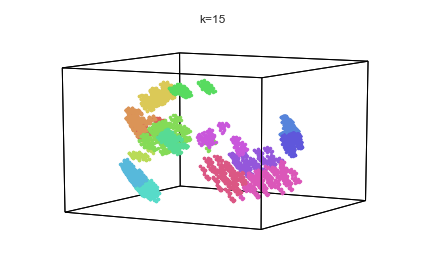

In [23]:
geo = hyp.plot(data, '.', reduce='PCA', title='PCA')
ks = [3,6,9,12,15]
for k in ks:
    geo.plot(n_clusters=k, title='k=' + str(k))

### ICA projection with different k values

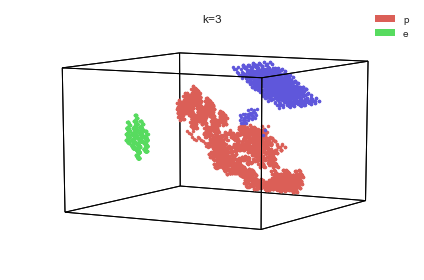

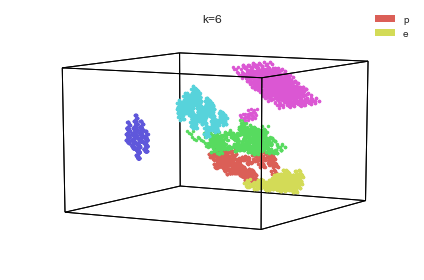

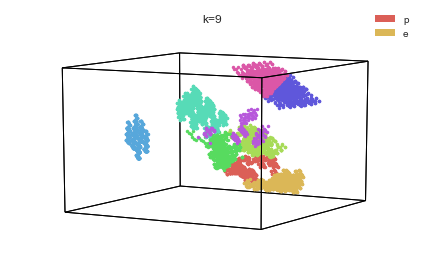

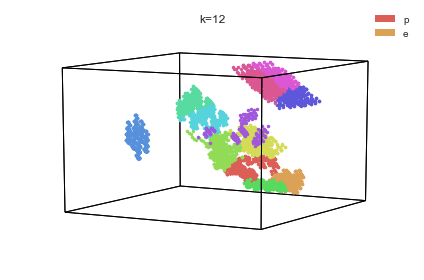

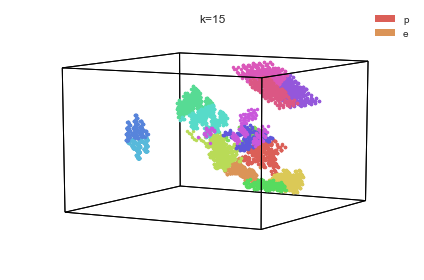

In [25]:
for k in ks:
    geo_ica.plot(n_clusters=k, title='k=' + str(k))

### t-SNE projection with different k values

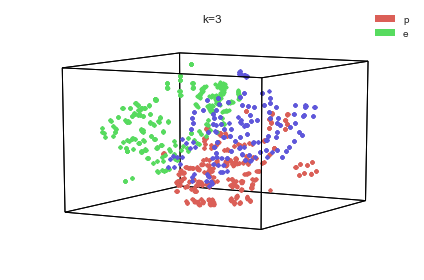

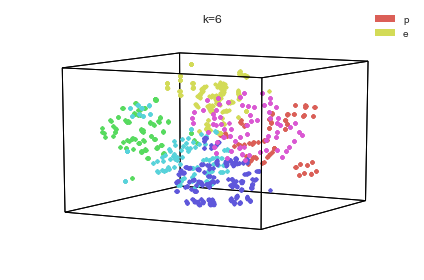

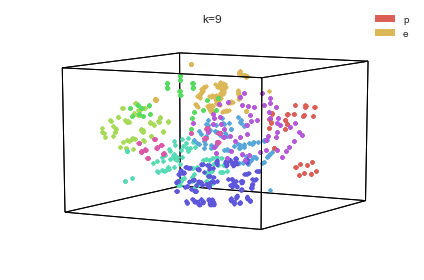

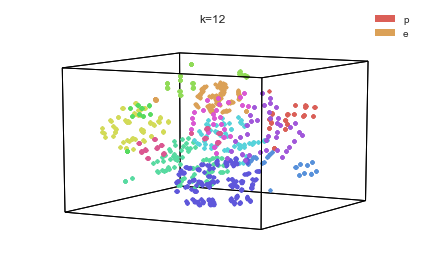

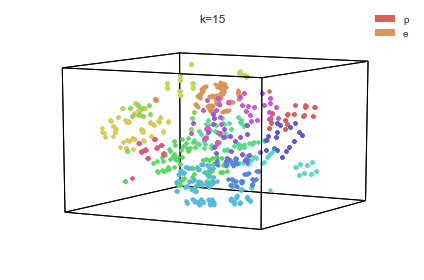

In [24]:
for k in ks:
    geo_tsne.plot(n_clusters=k, title='k=' + str(k))